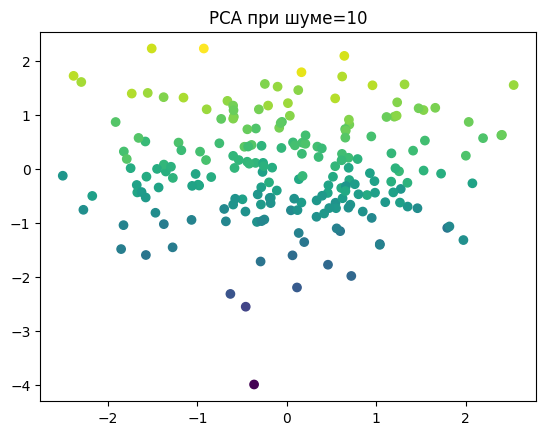

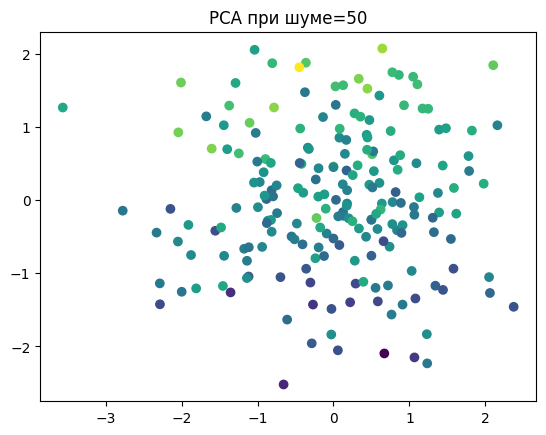

In [10]:
# Задание 1: Влияние уровня шума на PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=2, noise=10)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA при шуме=10")
plt.show()

# Повышение шума
X, y = make_regression(n_samples=200, n_features=2, noise=50)
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA при шуме=50")
plt.show()

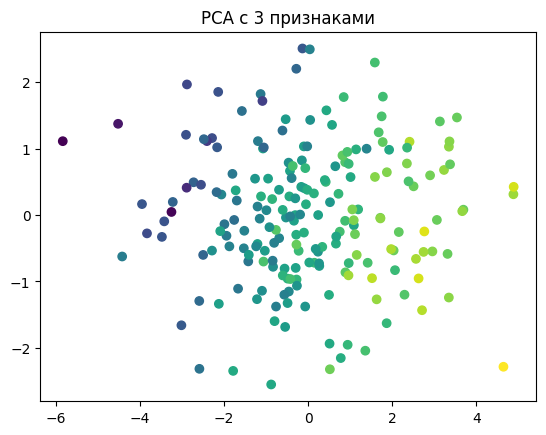

In [11]:
# Задание 2: Добавление третьего коррелирующего признака
X, y = make_regression(n_samples=200, n_features=2, noise=10)
X_new = np.c_[X, X[:, 0] + X[:, 1] + np.random.normal(0, 1, size=(X.shape[0]))]
X_pca = PCA(n_components=2).fit_transform(X_new)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA с 3 признаками")
plt.show()

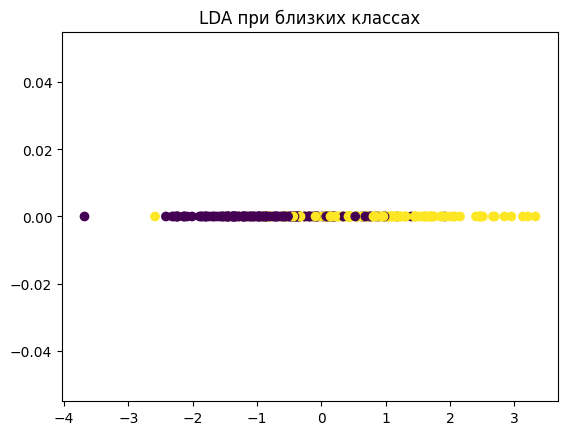

In [12]:
# Задание 3: Влияние близости классов на LDA
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.5, random_state=42)
X_lda = LDA(n_components=1).fit_transform(X, y)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y)
plt.title("LDA при близких классах")
plt.show()


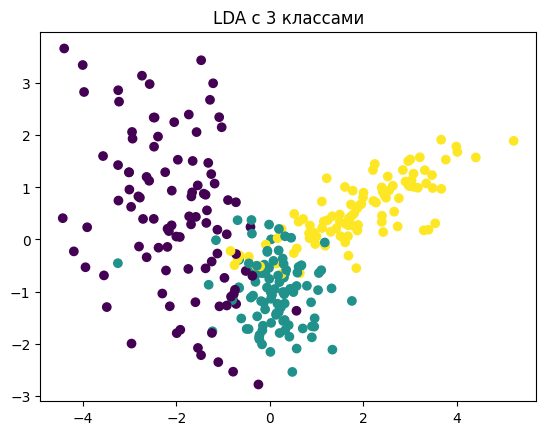

In [13]:
# Задание 4: Три класса и LDA
X, y = make_classification(n_samples=300, n_features=2, n_classes=3,
                           n_clusters_per_class=1, n_redundant=0,
                           n_informative=2, random_state=0)
X_lda = LDA(n_components=2).fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title("LDA с 3 классами")
plt.show()


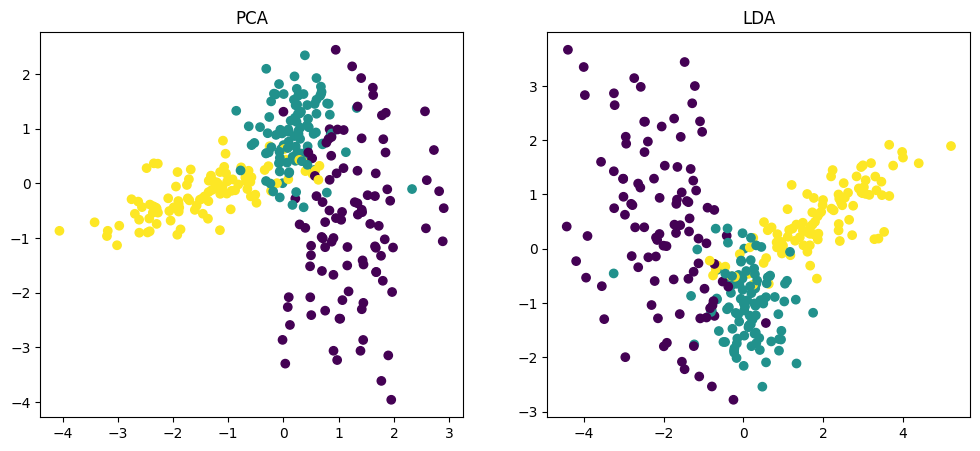

In [14]:
# Задание 5: Сравнение PCA и LDA
X_pca = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA")
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title("LDA")
plt.show()

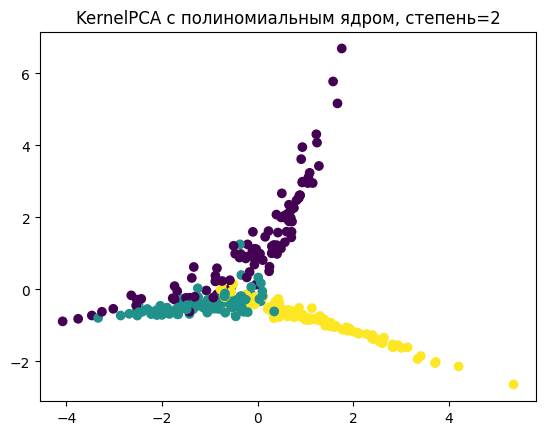

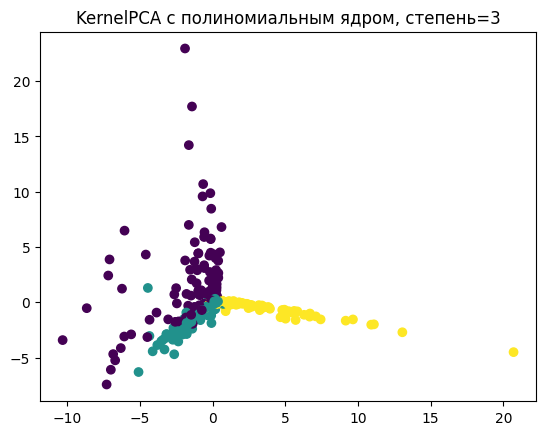

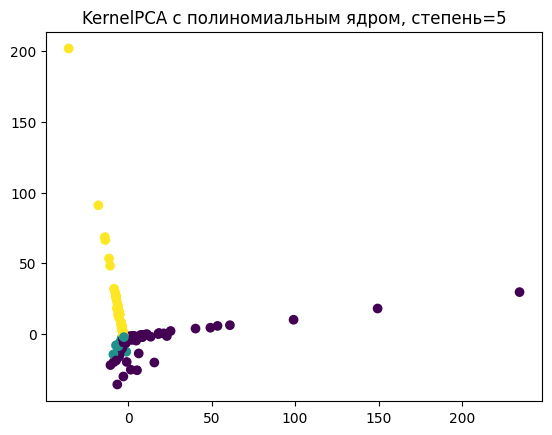

In [15]:
# Задание 6: KernelPCA с разным degree
from sklearn.decomposition import KernelPCA

for d in [2, 3, 5]:
    kpca = KernelPCA(kernel='poly', degree=d)
    X_kpca = kpca.fit_transform(X)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
    plt.title(f"KernelPCA с полиномиальным ядром, степень={d}")
    plt.show()

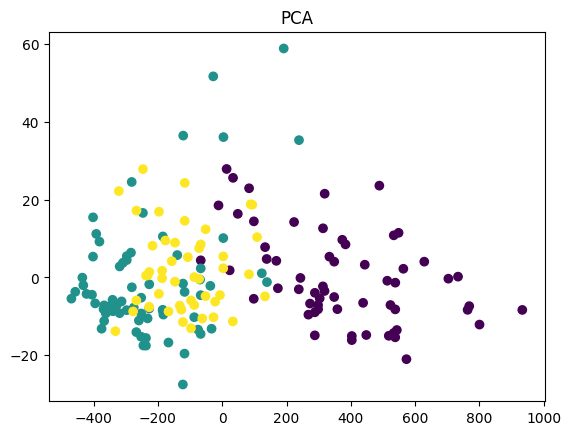

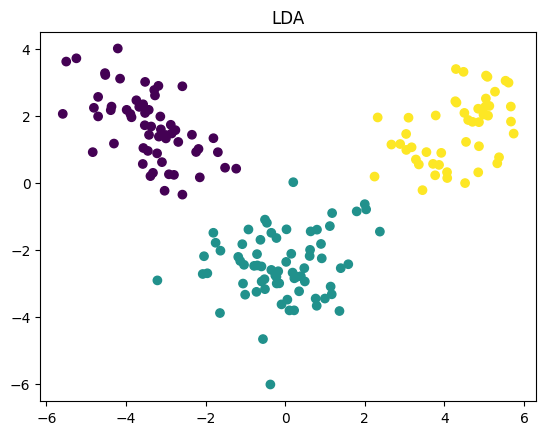

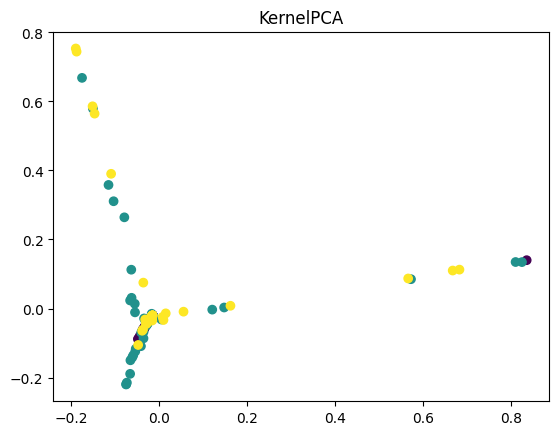

In [16]:
# Задание 7: Применение всех методов к классификационному датасету
from sklearn.datasets import load_wine

data = load_wine()
X, y = data.data, data.target

methods = {
    "PCA": PCA(n_components=2),
    "LDA": LDA(n_components=2),
    "KernelPCA": KernelPCA(kernel='rbf', gamma=0.01)
}

for name, method in methods.items():
    X_transformed = method.fit_transform(X, y)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
    plt.title(name)
    plt.show()

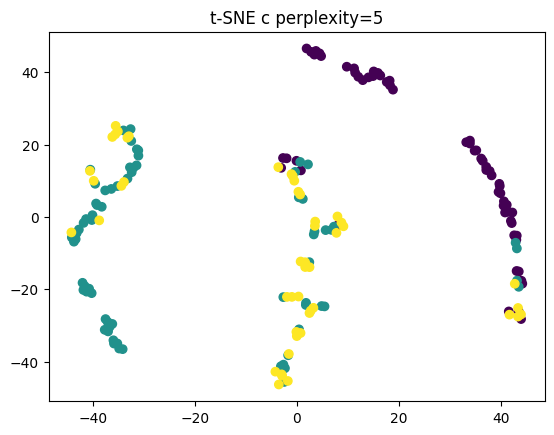

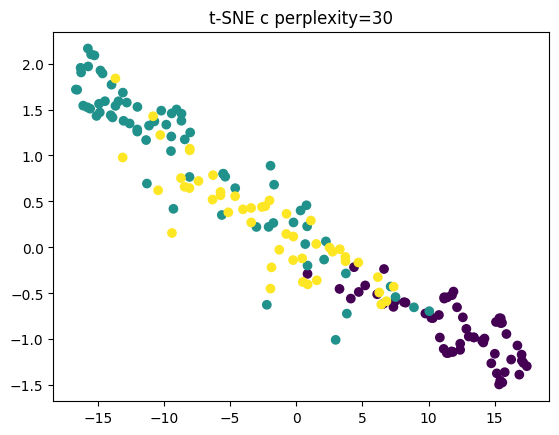

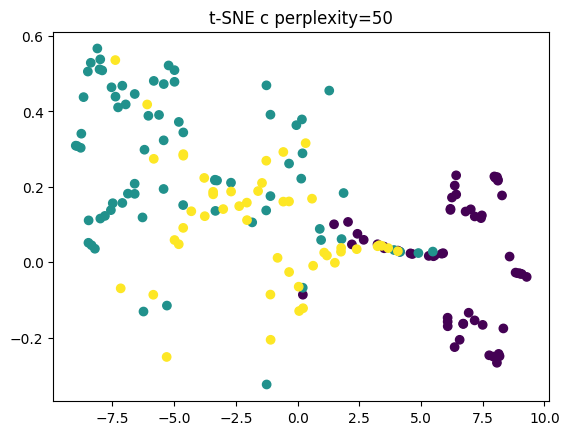

In [17]:
# Задание 8: Влияние perplexity в t-SNE
from sklearn.manifold import TSNE

for p in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
    plt.title(f"t-SNE с perplexity={p}")
    plt.show()

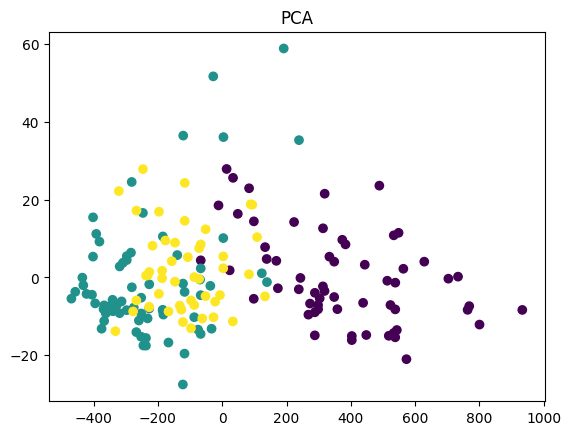

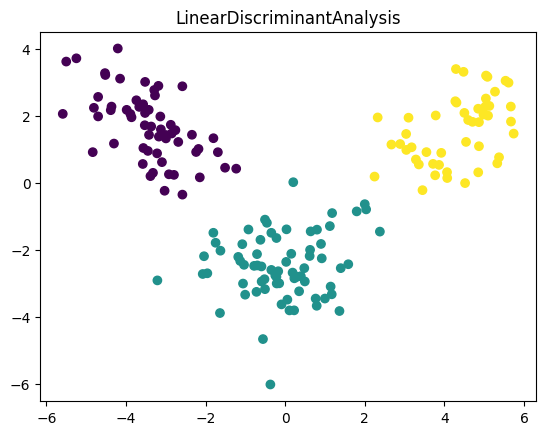

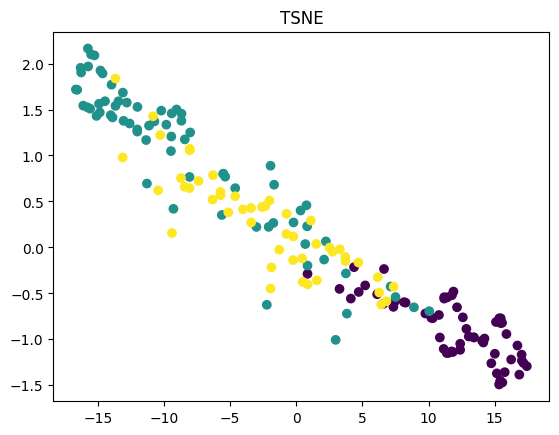

In [18]:
# Задание 9: Визуализация разными методами
for method in [PCA(n_components=2), LDA(n_components=2), TSNE(n_components=2)]:
    name = method.__class__.__name__
    X_vis = method.fit_transform(X, y)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y)
    plt.title(name)
    plt.show()

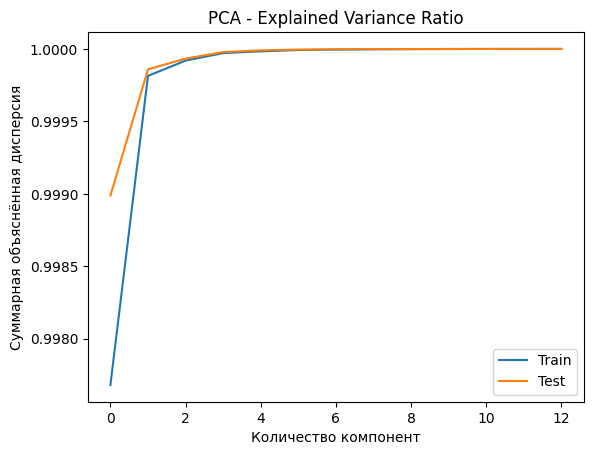

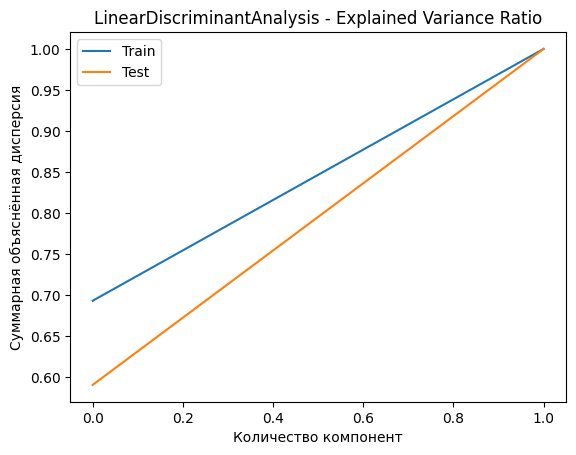

In [19]:
# Задание 10 и 11: Метрика объяснённой дисперсии
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for method in [PCA(n_components=None), LDA(n_components=None)]:
    name = method.__class__.__name__
    method.fit(X_train, y_train)
    evr_train = np.cumsum(method.explained_variance_ratio_)
    method.fit(X_test, y_test)
    evr_test = np.cumsum(method.explained_variance_ratio_)
    plt.plot(evr_train, label="Train")
    plt.plot(evr_test, label="Test")
    plt.title(f"{name} - Explained Variance Ratio")
    plt.xlabel("Количество компонент")
    plt.ylabel("Суммарная объяснённая дисперсия")
    plt.legend()
    plt.show()